<a href="https://colab.research.google.com/github/yeonghun00/Twitter-Sentiment-Analysis/blob/main/Market%20Sentiment%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install openai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import os
import re
import pandas as pd
import numpy as np
from datetime import datetime
from dateutil.relativedelta import relativedelta

import snscrape.modules.twitter as sntwitter

import matplotlib.pyplot as plt

from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

In [5]:
today = datetime.today()

search = 'NASDAQ'

min_faves = 200
lang = 'en'
until = today.strftime('%Y-%m-%d')
since = (today - relativedelta(months=3)).strftime('%Y-%m-%d')

In [6]:
def get_tweet_df(search, min_faves, lang, until, since):
  query = '{} min_faves:{} lang:{} until:{} since:{}'.format(search, min_faves, lang, until, since)
  tweets = []
  limit = 5000

  for tweet in sntwitter.TwitterSearchScraper(query).get_items(): 
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.date, tweet.user, tweet.renderedContent, tweet.likeCount, tweet.viewCount])
        
  tweet_df = pd.DataFrame(tweets, columns=['date', 'user', 'tweet', 'like', 'view'])

  return tweet_df

In [7]:
tweet_df = get_tweet_df(search, min_faves, lang, until, since)
tweet_df['date'] = [x.date() for x in tweet_df['date']]

In [8]:
def clean_text(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
  text = re.sub(r'https?:\/\/\S+', '', text) # remove hyperlinks
  text = re.sub(r'#', '', text) # remove #s
  return text

In [9]:
tweet_df.loc[:,'tweet'] = [clean_text(x) for x in tweet_df.loc[:,'tweet']]

In [10]:
# Vader Polarity

analyzer = SentimentIntensityAnalyzer()

tweet_df = pd.concat([tweet_df, pd.DataFrame([analyzer.polarity_scores(text) for text in tweet_df['tweet']])], axis=1)

In [11]:
# TextBlob Sebjectivity

tweet_df['subjectivity'] = [TextBlob(text).sentiment.subjectivity for text in tweet_df['tweet']]

In [12]:
tweet_df

,date,user,tweet,like,view,neg,neu,pos,compound,subjectivity
0,2023-02-13,https://twitter.com/counternotions,Facebook parent company Meta Platforms intends...,2011,707326,0.000,1.000,0.000,0.0000,0.175000
1,2023-02-13,https://twitter.com/BP_Rising,"Chart breakdown of Nasdaq big picture. ""Return...",883,106662,0.000,0.702,0.298,0.8807,0.429167
2,2023-02-13,https://twitter.com/tier10k,[DB] US Open\n\nS&amp;P500: +0.15%\nNasdaq: +0...,219,61460,0.000,1.000,0.000,0.0000,0.500000
3,2023-02-12,https://twitter.com/gurgavin,FUTURES JUST OPENED \n\nS&amp;P 500 DOWN 0.1% ...,516,104057,0.000,1.000,0.000,0.0000,0.223333
4,2023-02-12,https://twitter.com/pitdesi,During Ballmers tenure the Nasdaq was down 13%...,355,55882,0.000,1.000,0.000,0.0000,0.288889
...,...,...,...,...,...,...,...,...,...,...
99,2023-01-18,https://twitter.com/tier10k,[DB] US Close\n\nS&amp;P500: -1.55%\nNasdaq: -...,519,186076,0.000,1.000,0.000,0.0000,0.000000
100,2023-01-18,https://twitter.com/taesoothe,"The source is Investing. com, if anyone wants ...",1418,42116,0.000,0.886,0.114,0.4819,0.033333
101,2023-01-17,https://twitter.com/MFHoz,The 10Y is consolidating before its final move...,1835,514668,0.044,0.956,0.000,-0.2732,1.000000
102,2023-01-17,https://twitter.com/GainsNetwork_io,🍏 Indices are now *live* on gTrade! 🍏\n\nWe've...,438,89221,0.000,0.765,0.235,0.8975,0.500000


In [13]:
trend_df = tweet_df.groupby(by='date').mean()

In [14]:
tweet_df['date'].drop_duplicates().values

array([datetime.date(2023, 2, 13), datetime.date(2023, 2, 12),
       datetime.date(2023, 2, 11), datetime.date(2023, 2, 10),
       datetime.date(2023, 2, 9), datetime.date(2023, 2, 8),
       datetime.date(2023, 2, 7), datetime.date(2023, 2, 6),
       datetime.date(2023, 2, 5), datetime.date(2023, 2, 3),
       datetime.date(2023, 2, 2), datetime.date(2023, 2, 1),
       datetime.date(2023, 1, 31), datetime.date(2023, 1, 30),
       datetime.date(2023, 1, 29), datetime.date(2023, 1, 27),
       datetime.date(2023, 1, 26), datetime.date(2023, 1, 25),
       datetime.date(2023, 1, 24), datetime.date(2023, 1, 23),
       datetime.date(2023, 1, 22), datetime.date(2023, 1, 20),
       datetime.date(2023, 1, 18), datetime.date(2023, 1, 17),
       datetime.date(2023, 1, 16)], dtype=object)

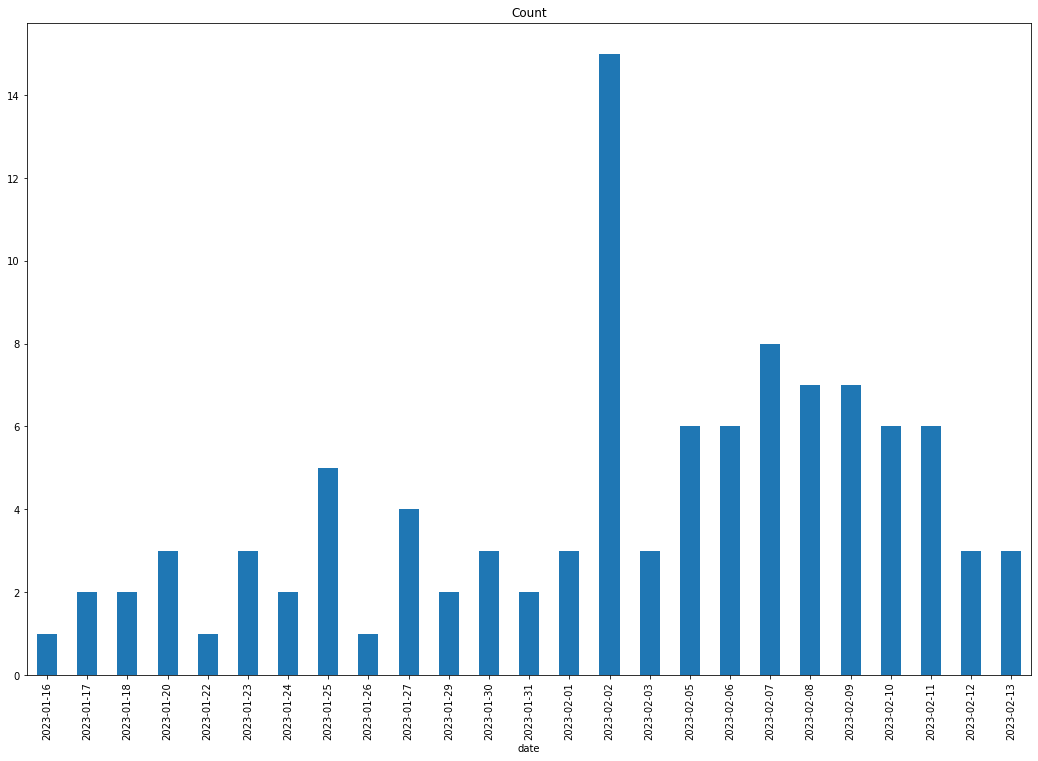

In [15]:
from sklearn.linear_model import Ridge

tweet_df.groupby(by='date').count()['tweet'].plot(kind='bar', figsize=(18,12))
plt.title('Count')
plt.show()

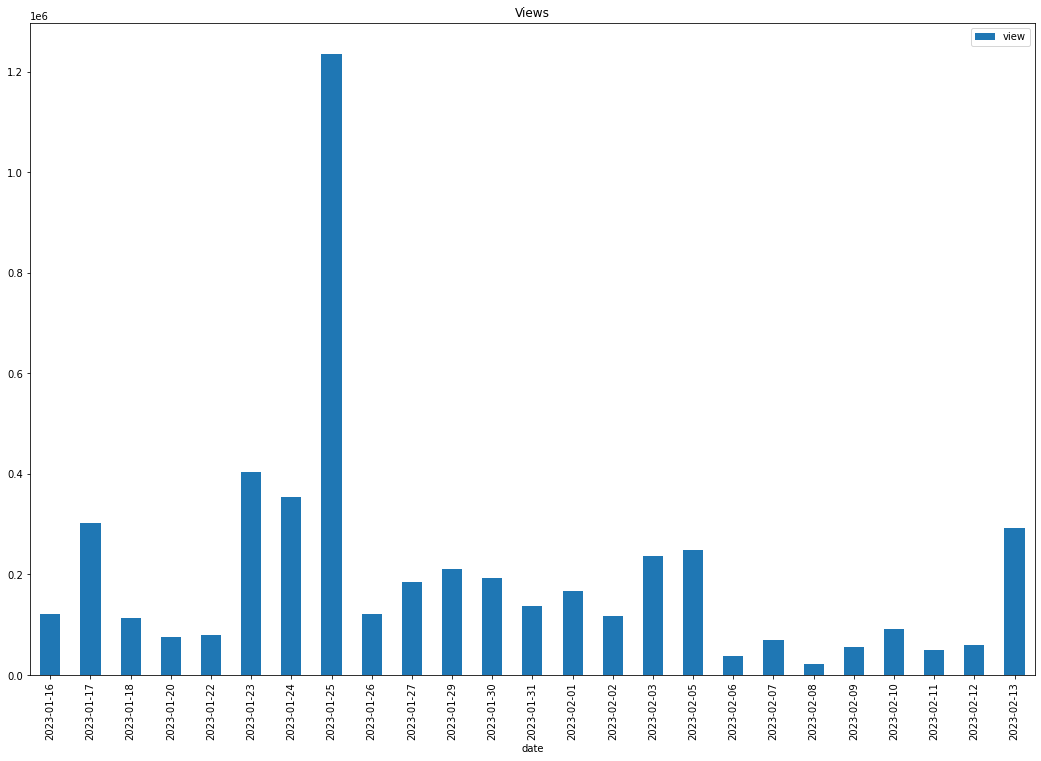

In [16]:
trend_df[['view']].groupby(by='date').mean().plot(kind='bar', figsize=(18,12))
tweet_df.groupby(by='date').count()['tweet'].plot(kind='bar', figsize=(18,12))
plt.title('Views')
plt.show()

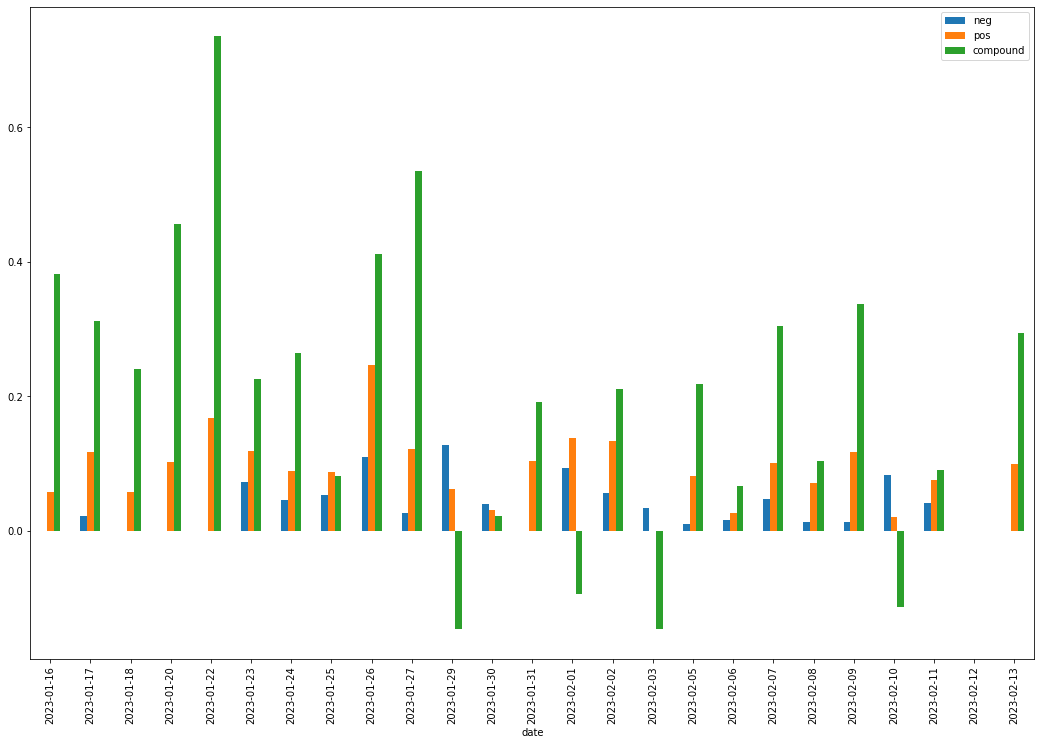

In [17]:
trend_df[['neg', 'pos', 'compound']].groupby(by='date').mean().plot(kind='bar', figsize=(18,12))
plt.show()

In [48]:
import plotly.graph_objects as go

def plot_gauge(search, value, reference=-1):
  fig = go.Figure(go.Indicator(
      domain = {'x': [0, 1], 'y': [0, 1]},
      value = value,
      mode = "gauge+number+delta",
      title = {'text': "{} FEAR & GREED".format(search)},
      delta = {'reference': reference} if reference != -1 else {'reference': value},
      gauge = {'axis': {'range': [None, 100]},
              'bar': {'color': "lightblue", 'thickness':0.3},
              'steps' : [
                  {'range': [75, 100], 'color': "#79fc74"},
                  {'range': [55, 75], 'color': "#a2fac8"},
                  {'range': [45, 55], 'color': "#f9fa9d"},
                  {'range': [25, 45], 'color': "#ffcf87"},
                  {'range': [0, 25], 'color': "#ff8e8a"}],
              }))

  fig.show()

In [67]:
trend_df > (today - relativedelta(months=1)).date()

TypeError: ignored

In [65]:
trend_df.loc[(today - relativedelta(months=1)).date()]

KeyError: ignored

In [57]:
trend_df['compound'] > (today - relativedelta(months=1)).strftime('%Y-%m-%d')


TypeError: ignored

In [50]:
plot_gauge(search, trend_df['compound'].mean() * 100 + 50)

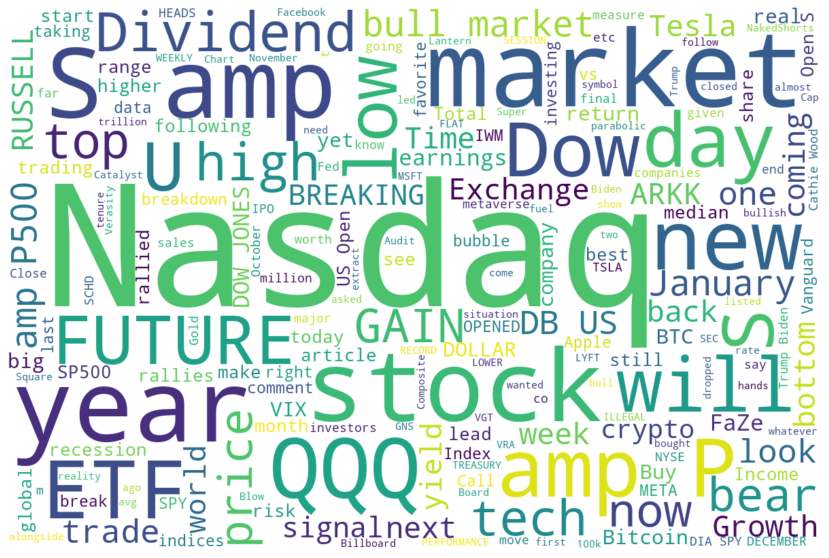

In [21]:
# WordCloud

all_words = ' '.join([x for x in tweet_df['tweet']])
word_cloud = WordCloud(width=1200, height=800, background_color='white').generate(all_words)

plt.figure(figsize=(18,10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [22]:
from sklearn.preprocessing import normalize

scatter_df = tweet_df.sample(n=100)
norm_view = normalize([scatter_df['view'].values], norm="max")[0]
norm_like = normalize([scatter_df['like'].values], norm="max")[0]

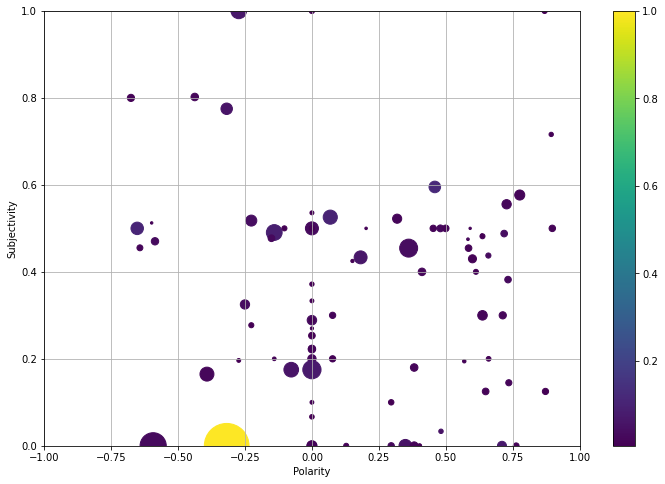

In [23]:
plt.figure(figsize=(12,8))
plt.scatter(scatter_df.iloc[:]['compound'], scatter_df.iloc[:]['subjectivity'], s=norm_view[:]*2000, c=norm_like[:])
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.xlim(-1, 1)
plt.ylim(0, 1)
plt.colorbar()
plt.grid()
plt.show()

In [24]:
import os
import json
import openai

In [25]:
#Store you OpenAPI key in a json file

OPENAI_API_KEY = ''
with open('/content/OpenAI.json', 'r') as file_to_read:
    json_data = json.load(file_to_read)
    OPENAI_API_KEY = json_data["OPENAI_API_KEY"]

openai.api_key =  OPENAI_API_KEY

FileNotFoundError: ignored

In [ ]:
i =1
tweet_str=''
for tweet in tweet_list:
   tweet_str = tweet_str + str(i) +'.'+'"'+tweet+'"'+'\n'
   i=i+1
   if i == 30:
     break

In [ ]:
prompt="Classify the sentiment in these tweets with probability:\n" + tweet_str + "\n Tweet sentiment ratings:"

In [ ]:
print(prompt)

In [ ]:
response = openai.Completion.create(
  model="text-davinci-003",
  prompt= prompt,
  temperature=0,
  max_tokens=120,
  top_p=1.0,
  frequency_penalty=0.0,
  presence_penalty=0.0
)

In [ ]:
(response["choices"][0]["text"]).split('\n')[1:]